# Zomato Orders Exploratory Analysis

## Contents:
    
   1. Introduction
   2. Problem Statement and about data
   3. Importing required libraries 
   4. Establishing connection with Database
   5. Exploratory Analysis and Visualization
   6. Explanation for each analysis
    
### Introduction:

  In this project we are going to analyse Zomato Orders data , performing some real world analysis and get answers to some
  interesting and important questions from this data by doing EDA(Exploratory Data Analysis) and look upon some important
  trends.
     
### Problem Statement:

   Zomato, a popular food delivery platform, has collected data on customer orders across various restaurants. 
   The dataset includes information about users, restaurants, menu, order details, food items, and delivery partners. The          objective is to analyze this data to gain insights into the ordering patterns, revenue generation, and popularity of            different food types across different restaurants.

   Specifically,  we aim to visualize these insights through different charts to help Zomato better understand customer            preferences and optimize their offerings accordingly.
     
### About Data:
  
   The data provided is of five different restaurants for the year 2022. The important thing to note is that only 3 months of 
   data(May, June, July) is provided.



In [1]:
#Let's import the required libraries 
import psycopg2 as pg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Creating the connection object 
conn = pg2.connect(database = 'zomato' , user = 'postgres' , password = xxxxx)

In [3]:
#Creating cursor object and executing query
cur1 = conn.cursor()
cur1.execute('select r.r_id,r_name,count(o.r_id) as no_of_times_ordered from orders o join restaurants r on o.r_id = r.r_id group by r.r_id order by 3 desc,1')

### Here we will try to find which restaurant has the most number of orders.

In [4]:
#Fetching data
cur1.fetchall()

[(2, 'kfc', 8),
 (1, 'dominos', 5),
 (4, 'Dosa Plaza', 5),
 (3, 'box8', 4),
 (5, 'China Town', 3)]

In [5]:
#Loading the data
df1 = pd.read_sql_query("select r.r_id,r_name,count(o.r_id) as no_of_times_ordered from orders o join restaurants r on o.r_id = r.r_id group by r.r_id order by 3 desc,1",conn)
df1

C:\Users\ascen\AppData\Local\Temp\ipykernel_16928\1921627308.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql_query("select r.r_id,r_name,count(o.r_id) as no_of_times_ordered from orders o join restaurants r on o.r_id = r.r_id group by r.r_id order by 3 desc,1",conn)


,r_id,r_name,no_of_times_ordered
0,2,kfc,8
1,1,dominos,5
2,4,Dosa Plaza,5
3,3,box8,4
4,5,China Town,3


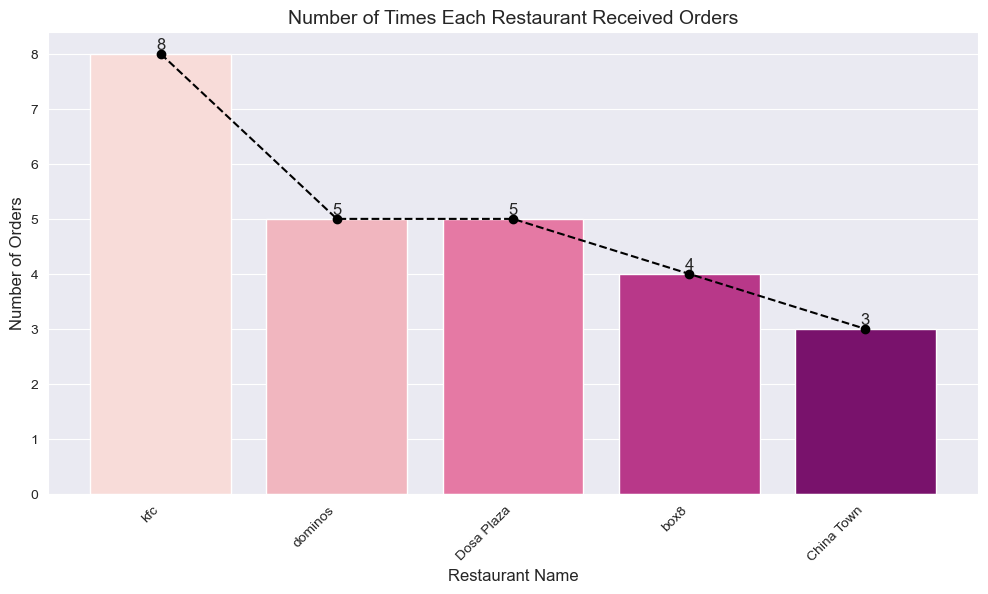

In [31]:
# Set the Seaborn style
sns.set_style("darkgrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='r_name', y='no_of_times_ordered', palette='RdPu')
plt.plot(df1['r_name'], df1['no_of_times_ordered'], marker='o', color='black', linestyle='--')

# Set title and labels
plt.title('Number of Times Each Restaurant Received Orders', fontsize=14)
plt.xlabel('Restaurant Name', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add annotations to the bar plot
for index, row in df1.iterrows():
    plt.annotate(f'{row["no_of_times_ordered"]}', xy=(row['r_name'], row['no_of_times_ordered']), xytext=(0, 3), textcoords='offset points', ha='center', fontsize=12)
# Show plot
plt.show()

The bar chart displays the number of times each restaurant received orders. This helps identify which restaurants are the most and least popular based on the number of orders they received.

Overall, this bar chart serves as a valuable tool for Zomato to understand order patterns, identify popular restaurants, and make data-driven decisions to enhance their service and restaurant partnerships.


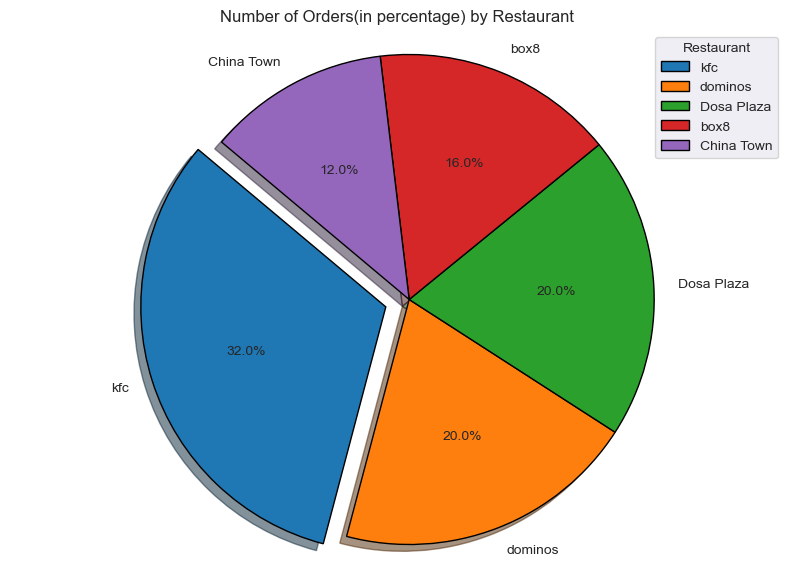

In [30]:
# Plotting the pie chart
plt.figure(figsize=(10, 7))

colors = sns.color_palette('tab10', len(df1['r_name']))
# Define explode data to highlight the largest slice
explode = [0.1 if count == max(df1['no_of_times_ordered']) else 0 for count in df1['no_of_times_ordered']]

plt.pie(df1['no_of_times_ordered'], labels=df1['r_name'], autopct='%1.1f%%', startangle=140, colors=colors,
       explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'})
plt.title('Number of Orders(in percentage) by Restaurant')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a legend with a title
plt.legend(title="Restaurant", loc="upper right")


# Display the pie chart
plt.show()


#### some insights based on the pie chart:
 
- The distribution of orders among restaurants shows varying degrees of market concentration, with some restaurants receiving a significant share of orders.
- The pie chart highlights diverse customer preferences, with certain restaurants favored over others.
- Restaurants with smaller shares of orders have opportunities for growth by analyzing and adopting successful strategies from higher-performing competitors.
- To capture a larger market share, underperforming restaurants should focus on differentiating themselves through unique offerings, superior service, or effective marketing campaigns.

### Next, we will try to find total earning and average order value for each restaurant.

In [25]:
cur2 = conn.cursor()
cur2.execute('select r.r_id,r_name,count(o.r_id) as no_of_times_ordered,sum(amount) as total,sum(amount)/count(o.r_id) as avg_order_value from orders o join restaurants r on o.r_id = r.r_id group by r.r_id order by 3 desc,1')

In [26]:
cur2.fetchall()

[(2, 'kfc', 8, 3570, 446),
 (1, 'dominos', 5, 3050, 610),
 (4, 'Dosa Plaza', 5, 1480, 296),
 (3, 'box8', 4, 940, 235),
 (5, 'China Town', 3, 1450, 483)]

In [27]:
df2 = pd.read_sql_query("select r.r_id,r_name,count(o.r_id) as no_of_times_ordered,sum(amount) as total,sum(amount)/count(o.r_id) as avg_order_value from orders o join restaurants r on o.r_id = r.r_id group by r.r_id order by 3 desc,1",conn)
df2

C:\Users\ascen\AppData\Local\Temp\ipykernel_16928\1488491149.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql_query("select r.r_id,r_name,count(o.r_id) as no_of_times_ordered,sum(amount) as total,sum(amount)/count(o.r_id) as avg_order_value from orders o join restaurants r on o.r_id = r.r_id group by r.r_id order by 3 desc,1",conn)


,r_id,r_name,no_of_times_ordered,total,avg_order_value
0,2,kfc,8,3570,446
1,1,dominos,5,3050,610
2,4,Dosa Plaza,5,1480,296
3,3,box8,4,940,235
4,5,China Town,3,1450,483


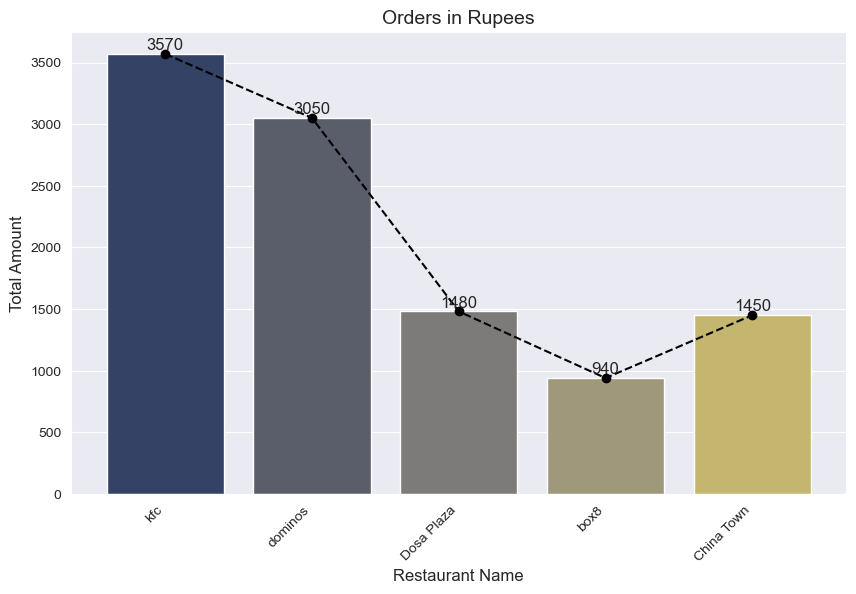

In [28]:
# Set the Seaborn style
sns.set_style("darkgrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df2, x='r_name', y='total',palette='cividis')

# Overlay a line plot
plt.plot(df2['r_name'], df2['total'], marker='o', color='black', linestyle='--')

# Set title and labels
plt.title('Orders in Rupees', fontsize=14)
plt.xlabel('Restaurant Name', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add annotations to the bar plot
for index, row in df2.iterrows():
   plt.annotate(f'{row["total"]}', xy=(row['r_name'], row['total']), xytext=(0, 3), textcoords='offset points', ha='center', fontsize=12)
  
plt.show()


This bar chart draws following insights:

1. **Revenue Distribution**:
   - The chart highlights a varied distribution of total order amounts across different restaurants, indicating differing levels of market penetration and customer preference.

2. **Market Leaders vs. Laggards**:
   - There's a clear distinction between market leaders with high revenue and others with comparatively lower figures, pointing to differences in brand strength, customer loyalty, and operational efficiency.

3. **Potential for Improvement**:
   - Restaurants with lower revenue have significant opportunities for growth by analyzing market leaders' strategies, improving service quality, menu offerings, or marketing efforts.

4. **Revenue Fluctuations**:
   - The pattern in the chart suggests fluctuations in revenue among the restaurants, highlighting the dynamic nature of the market and the need for continuous adaptation to changing customer preferences and market conditions.

These points provide a general overview of the trends and potential strategies for improvement in the competitive landscape depicted by this bar chart.

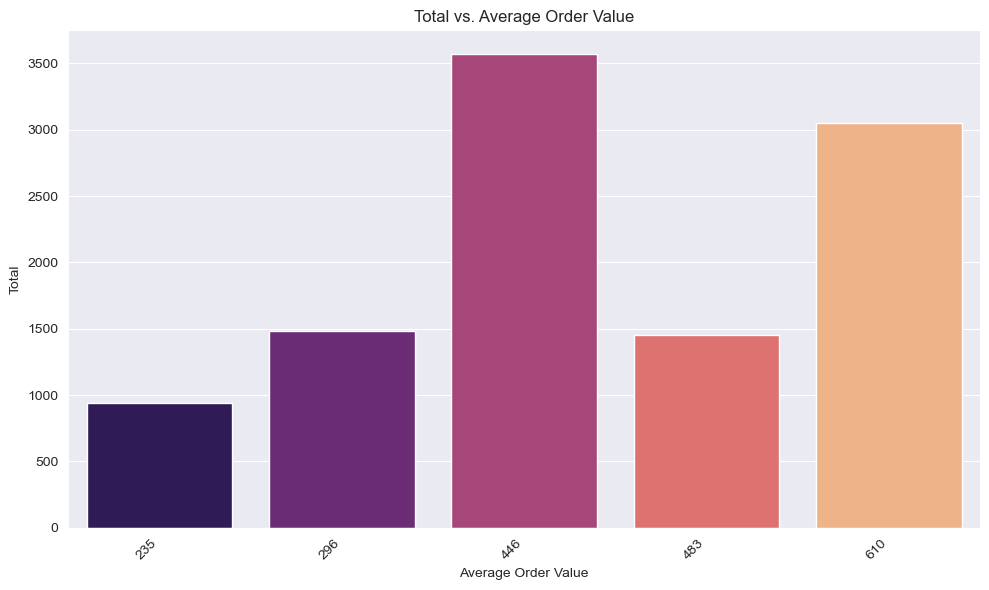

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df2 , x='avg_order_value' , y='total',palette='magma')
plt.title('Total vs. Average Order Value')
plt.xlabel('Average Order Value')
plt.ylabel('Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

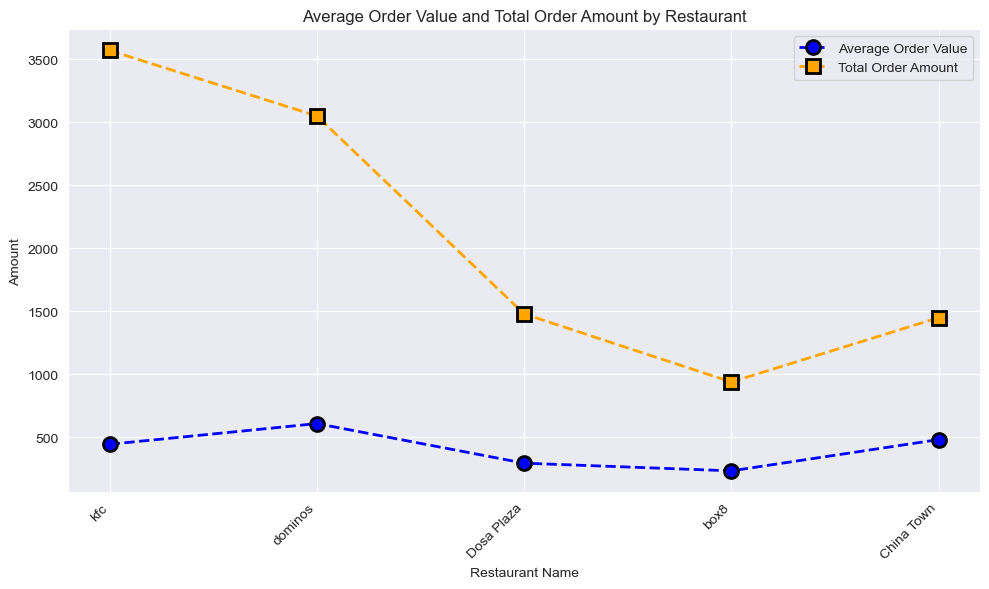

In [33]:
df = pd.DataFrame(df2)

# Sorting DataFrame by 'no_of_times_ordered' in descending order
df_sorted = df.sort_values(by='no_of_times_ordered', ascending=False)

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Plotting average order value
plt.plot(df_sorted['r_name'], df_sorted['avg_order_value'], marker='o', color='blue', linestyle='--' ,label='Average Order Value',lw=2,ms=10,mew=2,mec='black')

# Plotting total order amount
plt.plot(df_sorted['r_name'], df_sorted['total'], marker='s', color='orange',linestyle='--', label='Total Order Amount',lw=2,ms=10,mew=2,mec='black')

plt.xlabel('Restaurant Name')
plt.ylabel('Amount')
plt.title('Average Order Value and Total Order Amount by Restaurant')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Show grid for better visualization
plt.tight_layout()
plt.show()


- The above charts show the average order value against the total order amount. Average order value (AOV) is a crucial metric for businesses as it helps in deciding whether or when to go for coupons or any scheme that can attract more customers and, as a result, boost growth.

- By analyzing AOV trends over time, businesses can identify seasonal patterns and adjust their marketing strategies accordingly. 

- Identifying patterns in AOV can aid in refining customer acquisition strategies.

- By leveraging insights from the average order value against the total order amount, businesses can make informed decisions on pricing strategies, promotional offers, customer segmentation, and inventory management, ultimately driving growth and maximizing revenue.

### Now, we will try to evaluate the overall monthly revenue.

In [34]:
cur3 = conn.cursor()
cur3.execute('select extract(month from date) as month, sum(amount) as total_revenue from orders group by 1 order by 2 desc')

In [35]:
cur3.fetchall()

[(Decimal('7'), 4845), (Decimal('6'), 3220), (Decimal('5'), 2425)]

In [36]:
df3=pd.read_sql_query("select extract(month from date) as month, sum(amount) as total_revenue from orders group by 1 order by 2 desc",conn)
df3

C:\Users\ascen\AppData\Local\Temp\ipykernel_16928\4031167980.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3=pd.read_sql_query("select extract(month from date) as month, sum(amount) as total_revenue from orders group by 1 order by 2 desc",conn)


,month,total_revenue
0,7.0,4845
1,6.0,3220
2,5.0,2425


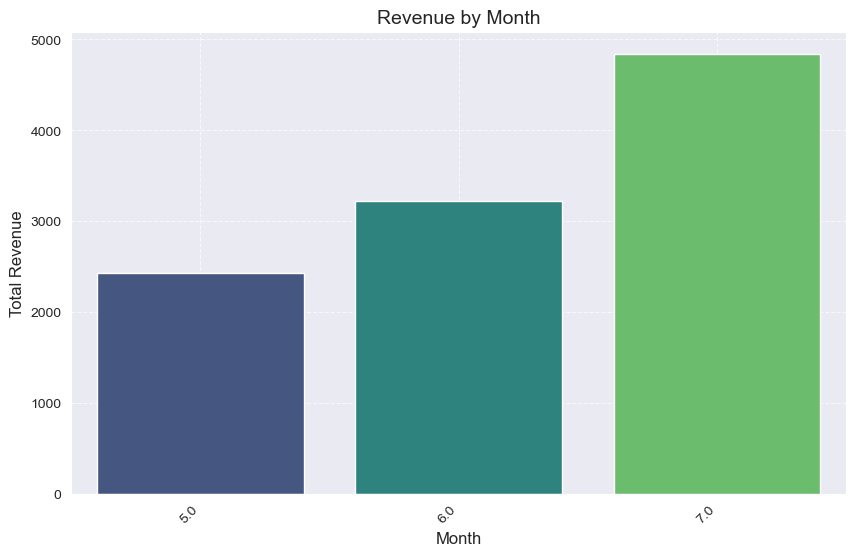

In [37]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df3, x='month', y='total_revenue', palette='viridis')

# Set title and labels
plt.title('Revenue by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

Here are some key observations and insights based on the chart:
 - Understanding revenue trends can aid in optimal resource allocation. For example, higher revenue months may require more staffing, inventory, or marketing spend, while lower revenue months can focus on cost-saving measures.
 - These insights can help businesses make informed decisions, optimize their operations, and strategically plan for future growth based on the observed revenue patterns.
 - Given the observed trend, businesses can plan strategically for the upcoming months by understanding the factors contributing to the revenue increase in july month. These factors might include marketing campaigns, seasonal demand, etc.

### Here we will focus on monthly revenue for each restaurant.

In [38]:
cur4 = conn.cursor()
cur4.execute('select r_id,extract(month from date) as month, sum(amount) as total_revenue from orders group by 1,2 order by 1,2 desc')

In [39]:
df4=pd.read_sql_query("select r_id,extract(month from date) as month, sum(amount) as total_revenue from orders group by 1,2 order by 1,2 desc",conn)
df4

C:\Users\ascen\AppData\Local\Temp\ipykernel_16928\730825065.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4=pd.read_sql_query("select r_id,extract(month from date) as month, sum(amount) as total_revenue from orders group by 1,2 order by 1,2 desc",conn)


,r_id,month,total_revenue
0,1,7.0,1100
1,1,6.0,950
2,1,5.0,1000
3,2,7.0,1935
4,2,6.0,990
5,2,5.0,645
6,3,7.0,460
7,3,6.0,480
8,4,7.0,300
9,4,6.0,400


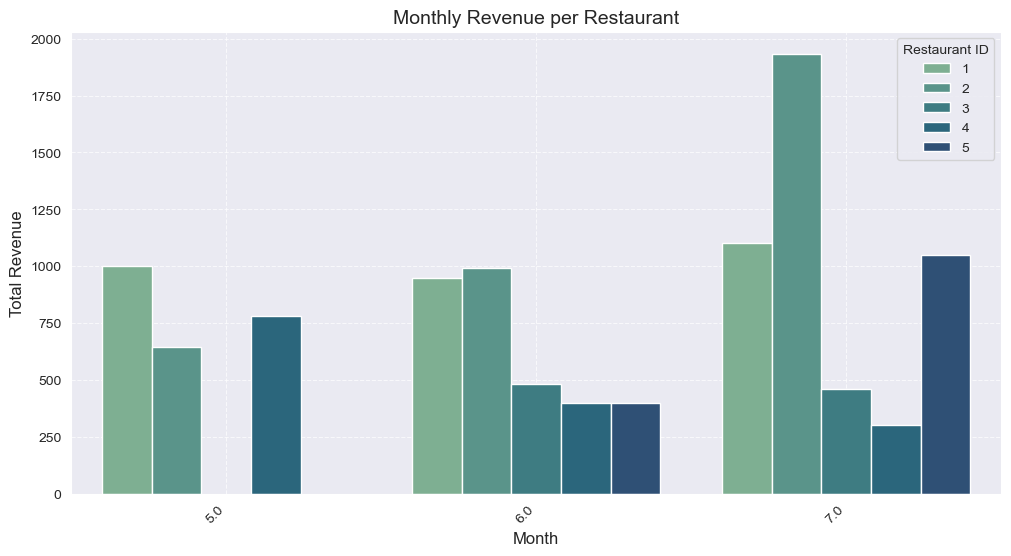

In [40]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df4, x='month', y='total_revenue', hue='r_id', palette='crest')

# Set title and labels
plt.title('Monthly Revenue per Restaurant', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Restaurant ID', loc='upper right')

# Add grid lines for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

#### some meaningful insights:
 - The spike in revenue for Restaurant ID 2 in month of july may be due to effective marketing strategies, menu changes,
   or customer loyalty programs.
 - The trend of increasing revenue in month of july suggests a seasonal or periodic increase in customer spending. 
   Restaurants can prepare for similar trends in future years by planning marketing campaigns and inventory accordingly.
 - Restaurants with consistently high revenues (like Restaurant ID 2) may need more resources during peak months to maintain service quality. Underperforming restaurants may need targeted interventions to improve revenue.
 
 These insights provide a comprehensive understanding of the performance of different restaurants over the specified months, helping in strategic planning, resource allocation, and performance improvement initiatives.

### Let's focus on delivery partners, finding which partner has delivered the most number of orders.

In [41]:
cur5 = conn.cursor()
cur5.execute('select dp.partner_id, partner_name, count(o.partner_id) as no_of_times_delivered from delivery_partner dp join orders o on dp.partner_id=o.partner_id  group by 1,2 order by 3 desc')

In [42]:
cur5.fetchall()

[(1, 'Suresh', 7),
 (2, 'Amit', 6),
 (5, 'Gyandeep', 4),
 (4, 'Kartik', 4),
 (3, 'Lokesh', 4)]

In [43]:
df5=pd.read_sql_query("select dp.partner_id, partner_name, count(o.partner_id) as no_of_times_delivered from delivery_partner dp join orders o on dp.partner_id=o.partner_id  group by 1,2 order by 3 desc",conn)
df5

C:\Users\ascen\AppData\Local\Temp\ipykernel_16928\1152219750.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5=pd.read_sql_query("select dp.partner_id, partner_name, count(o.partner_id) as no_of_times_delivered from delivery_partner dp join orders o on dp.partner_id=o.partner_id  group by 1,2 order by 3 desc",conn)


,partner_id,partner_name,no_of_times_delivered
0,1,Suresh,7
1,2,Amit,6
2,5,Gyandeep,4
3,4,Kartik,4
4,3,Lokesh,4


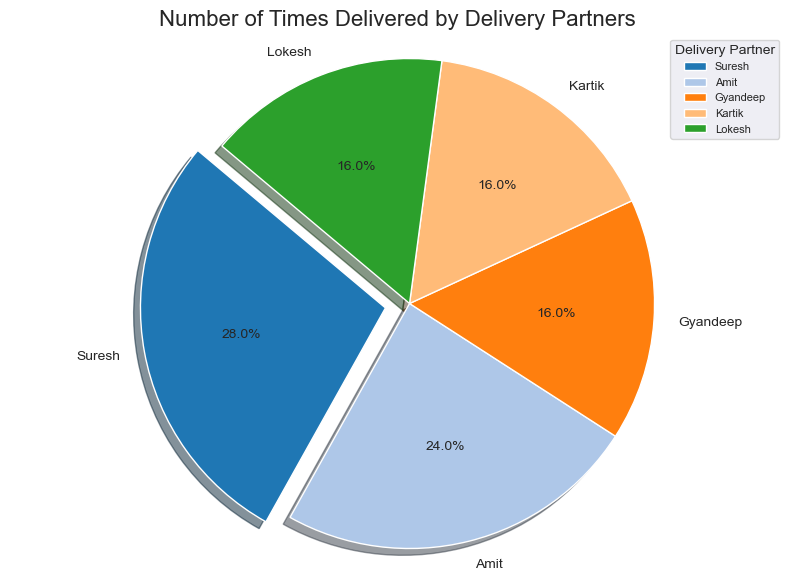

In [44]:
df = pd.DataFrame(df5)

# Sorting DataFrame by 'no_of_times_delivered' in descending order
df_sorted = df.sort_values(by='no_of_times_delivered', ascending=False)

# Define custom colors
colors = plt.cm.tab20.colors  # You can choose any colormap or specify custom colors

# Plotting the pie chart
plt.figure(figsize=(10, 7))
explode = [0.1 if i == max(df_sorted['no_of_times_delivered']) else 0 for i in df_sorted['no_of_times_delivered']]  # Explode the slice with maximum deliveries
plt.pie(df_sorted['no_of_times_delivered'], labels=df_sorted['partner_name'], autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Number of Times Delivered by Delivery Partners', fontsize=16)

# Add a legend with a title
plt.legend(title="Delivery Partner", loc="upper right", fontsize=8)

plt.show()


Analyzing the importance of delivery partners in a food delivery platform like Zomato involves looking at several factors, including customer satisfaction, operational efficiency, and revenue impact. 

### Finding amount Spent by Users in Different Restaurants.

In [45]:
cur6 = conn.cursor()
cur6.execute('select name, r_name, count(o.r_id) as no_of_times_ordered, sum(amount) as amount from users u join orders o on u.user_id = o.user_id join restaurants r on o.r_id = r.r_id group by 1,2')

In [46]:
cur6.fetchall()

[('Nitish', 'dominos', 1, 550),
 ('Ankit', 'China Town', 2, 800),
 ('Nitish', 'box8', 3, 700),
 ('Vartika', 'dominos', 1, 450),
 ('Ankit', 'Dosa Plaza', 3, 1000),
 ('Khushboo', 'dominos', 1, 950),
 ('Khushboo', 'China Town', 1, 650),
 ('Khushboo', 'kfc', 1, 530),
 ('Khushboo', 'box8', 1, 240),
 ('Vartika', 'Dosa Plaza', 1, 180),
 ('Nitish', 'kfc', 1, 415),
 ('Vartika', 'kfc', 3, 690),
 ('Khushboo', 'Dosa Plaza', 1, 300),
 ('Neha', 'dominos', 2, 1100),
 ('Neha', 'kfc', 3, 1935)]

In [47]:
df6=pd.read_sql_query("select name, r_name, count(o.r_id) as no_of_times_ordered, sum(amount) as amount from users u join orders o on u.user_id = o.user_id join restaurants r on o.r_id = r.r_id group by 1,2",conn)
df6

C:\Users\ascen\AppData\Local\Temp\ipykernel_16928\1741393836.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6=pd.read_sql_query("select name, r_name, count(o.r_id) as no_of_times_ordered, sum(amount) as amount from users u join orders o on u.user_id = o.user_id join restaurants r on o.r_id = r.r_id group by 1,2",conn)


,name,r_name,no_of_times_ordered,amount
0,Nitish,dominos,1,550
1,Ankit,China Town,2,800
2,Nitish,box8,3,700
3,Vartika,dominos,1,450
4,Ankit,Dosa Plaza,3,1000
5,Khushboo,dominos,1,950
6,Khushboo,China Town,1,650
7,Khushboo,kfc,1,530
8,Khushboo,box8,1,240
9,Vartika,Dosa Plaza,1,180


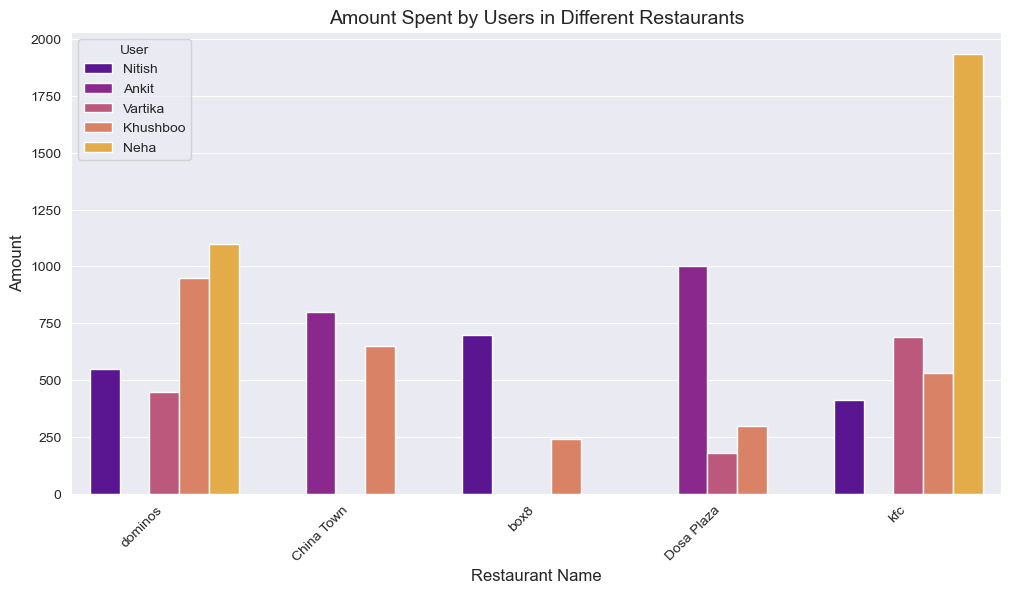

In [91]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df6, x='r_name', y='amount', hue='name',palette='plasma')

# Set labels and title
plt.xlabel('Restaurant Name', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Amount Spent by Users in Different Restaurants', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title='User')

# Show plot
plt.show()

- This provides valuable insights into customer preferences, restaurant performance, and strategic opportunities.

- Restaurants with consistently high user spending indicate popularity and strong customer preference. These restaurants likely offer high-quality food, excellent service, or unique menu items that attract repeat customers.

- Significant peak in user spending compared to others may be the result of successful promotional campaign, such as discounts, special events, limited-time offers, prime location or loyal customer base.

Let's consolidate their amount i.e total amount spent by each user.

In [48]:
df_amt_avg = df6.groupby('name')[['amount']].sum()
df_amt_avg


,amount
name,
Ankit,1800
Khushboo,2670
Neha,3035
Nitish,1665
Vartika,1320


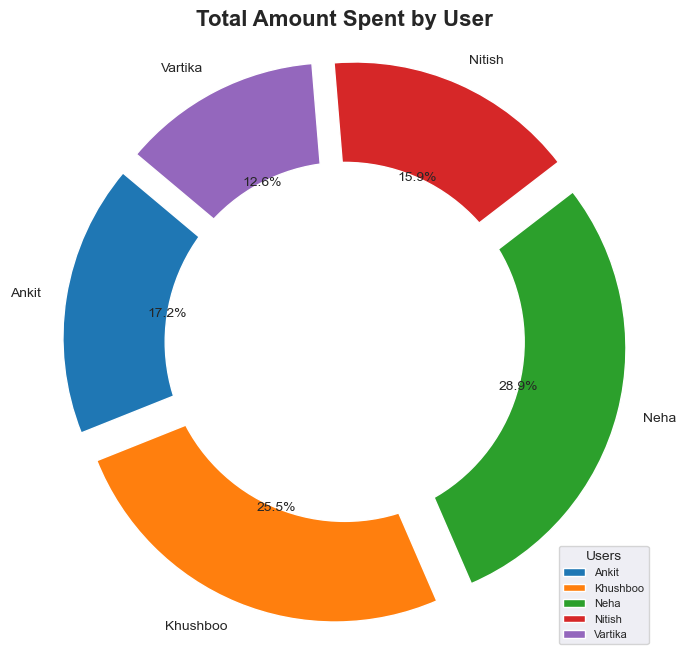

In [49]:

# Plotting the pie chart
plt.figure(figsize=(10, 8))  # Set figure size for better readability

# Explode the slices for emphasis, adjust as needed
explode = [0.1] * len(df_amt_avg.index)

# Use a color palette for better distinction
colors = plt.cm.tab10.colors

# Plot the pie chart
plt.pie(df_amt_avg['amount'], labels=df_amt_avg.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=colors)

# Set aspect ratio to 'equal' for circular pie chart
plt.axis('equal')

# Enhance title with fontweight and fontsize
plt.title('Total Amount Spent by User', fontsize=16, fontweight='bold')

# Add shadow for depth
plt.gca().set_facecolor('whitesmoke')  # Set background color to enhance contrast
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))  # Add a white circle to the center for better visualization of slices
plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to 'equal' for circular pie chart
plt.gca().set_frame_on(False)  # Turn off frame for cleaner look

# Add a legend with a title
plt.legend(title="Users", loc="lower right", fontsize=8)


# Show the pie chart
plt.show()


### Looking for the number of food items ordered on each order.

In [50]:
cur7 = conn.cursor()
cur7.execute('select order_id, count(f_id) as no_of_items_ordered from order_details group by 1 order by 2 desc')

In [51]:
cur7.fetchall()

[(1023, 3),
 (1025, 3),
 (1010, 3),
 (1006, 3),
 (1024, 3),
 (1004, 2),
 (1016, 2),
 (1021, 2),
 (1001, 2),
 (1002, 2),
 (1017, 2),
 (1007, 2),
 (1019, 2),
 (1020, 2),
 (1009, 2),
 (1003, 2),
 (1018, 2),
 (1022, 2),
 (1008, 2),
 (1005, 2),
 (1014, 1),
 (1015, 1),
 (1012, 1),
 (1011, 1),
 (1013, 1)]

In [52]:
df7=pd.read_sql_query("select order_id, count(f_id) as no_of_items_ordered from order_details group by 1 order by 2 desc",conn)
df7

C:\Users\ascen\AppData\Local\Temp\ipykernel_16928\2987732384.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df7=pd.read_sql_query("select order_id, count(f_id) as no_of_items_ordered from order_details group by 1 order by 2 desc",conn)


,order_id,no_of_items_ordered
0,1023,3
1,1025,3
2,1010,3
3,1006,3
4,1024,3
5,1004,2
6,1016,2
7,1021,2
8,1001,2
9,1002,2


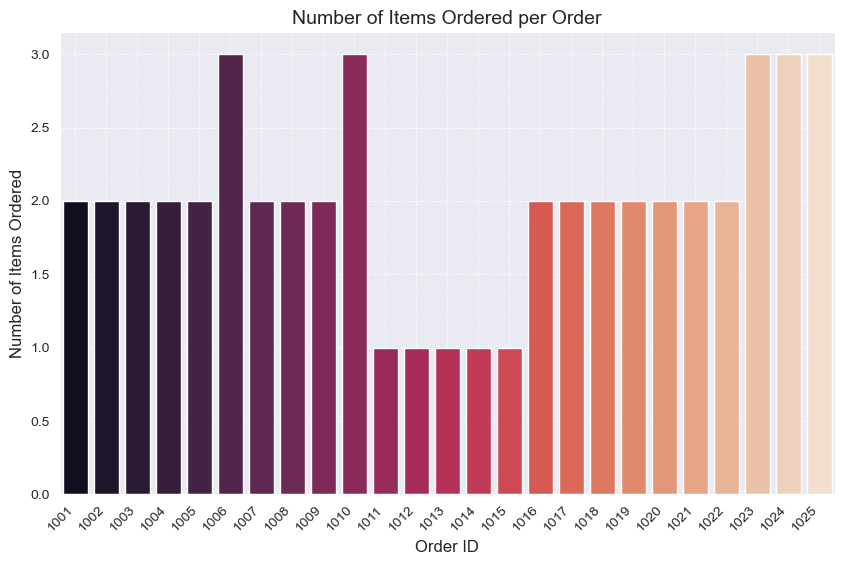

In [53]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.barplot(data=df7, x='order_id', y='no_of_items_ordered', palette='rocket')

# Set title and labels
plt.title('Number of Items Ordered per Order', fontsize=14)
plt.xlabel('Order ID', fontsize=12)
plt.ylabel('Number of Items Ordered', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

- By this we can analyze patterns and draw conclusions about customer behavior, preferences, and potential strategies for increasing order value.
- Peaks can indicate popular ordering times, special promotions, or menu items that encourage larger orders.
- Look for time-based trends, such as higher item counts during weekends or holidays. This can indicate when customers are more likely to place larger orders, allowing for targeted marketing during these periods.
- Design the menu to highlight popular item combinations and suggest add-ons to increase the average number of items per order.

### Let's find out the number of times each food item has been ordered.

In [54]:
cur8 = conn.cursor()
cur8.execute('select f.f_id, f_name, type, count(od.f_id) as no_of_times_ordered from food f join order_details od on f.f_id = od.f_id group by 1,2,3 order by 4 desc')

In [55]:
cur8.fetchall()

[(3, 'Choco Lava cake', 'Veg', 13),
 (4, 'Chicken Wings', 'Non-veg', 8),
 (1, 'Non-veg Pizza', 'Non-veg', 5),
 (8, 'Masala Dosa', 'Veg', 4),
 (10, 'Schezwan Noodles', 'Veg', 4),
 (6, 'Rice Meal', 'Veg', 4),
 (11, 'Veg Manchurian', 'Veg', 4),
 (5, 'Chicken Popcorn', 'Non-veg', 3),
 (9, 'Rava Idli', 'Veg', 3),
 (2, 'Veg Pizza', 'Veg', 1),
 (7, 'Roti meal', 'Veg', 1)]

In [56]:
df8 = pd.read_sql_query("select f.f_id, f_name, type, count(od.f_id) as no_of_times_ordered from food f join order_details od on f.f_id = od.f_id group by 1,2,3 order by 4 desc",conn)
df8

C:\Users\ascen\AppData\Local\Temp\ipykernel_16928\2043946444.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df8 = pd.read_sql_query("select f.f_id, f_name, type, count(od.f_id) as no_of_times_ordered from food f join order_details od on f.f_id = od.f_id group by 1,2,3 order by 4 desc",conn)


,f_id,f_name,type,no_of_times_ordered
0,3,Choco Lava cake,Veg,13
1,4,Chicken Wings,Non-veg,8
2,1,Non-veg Pizza,Non-veg,5
3,8,Masala Dosa,Veg,4
4,10,Schezwan Noodles,Veg,4
5,6,Rice Meal,Veg,4
6,11,Veg Manchurian,Veg,4
7,5,Chicken Popcorn,Non-veg,3
8,9,Rava Idli,Veg,3
9,2,Veg Pizza,Veg,1


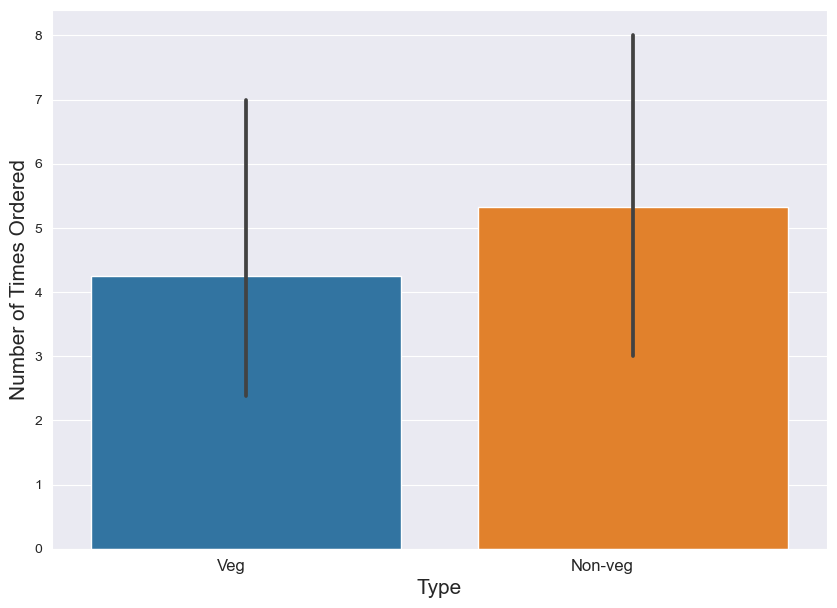

In [59]:
plt.figure(figsize=(10,7))
sns.barplot(data=df8 , x='type' , y='no_of_times_ordered')
# Set labels
plt.xlabel('Type', fontsize=15)
plt.ylabel('Number of Times Ordered', fontsize=15)
plt.xticks(rotation=0, ha='right', fontsize=12);


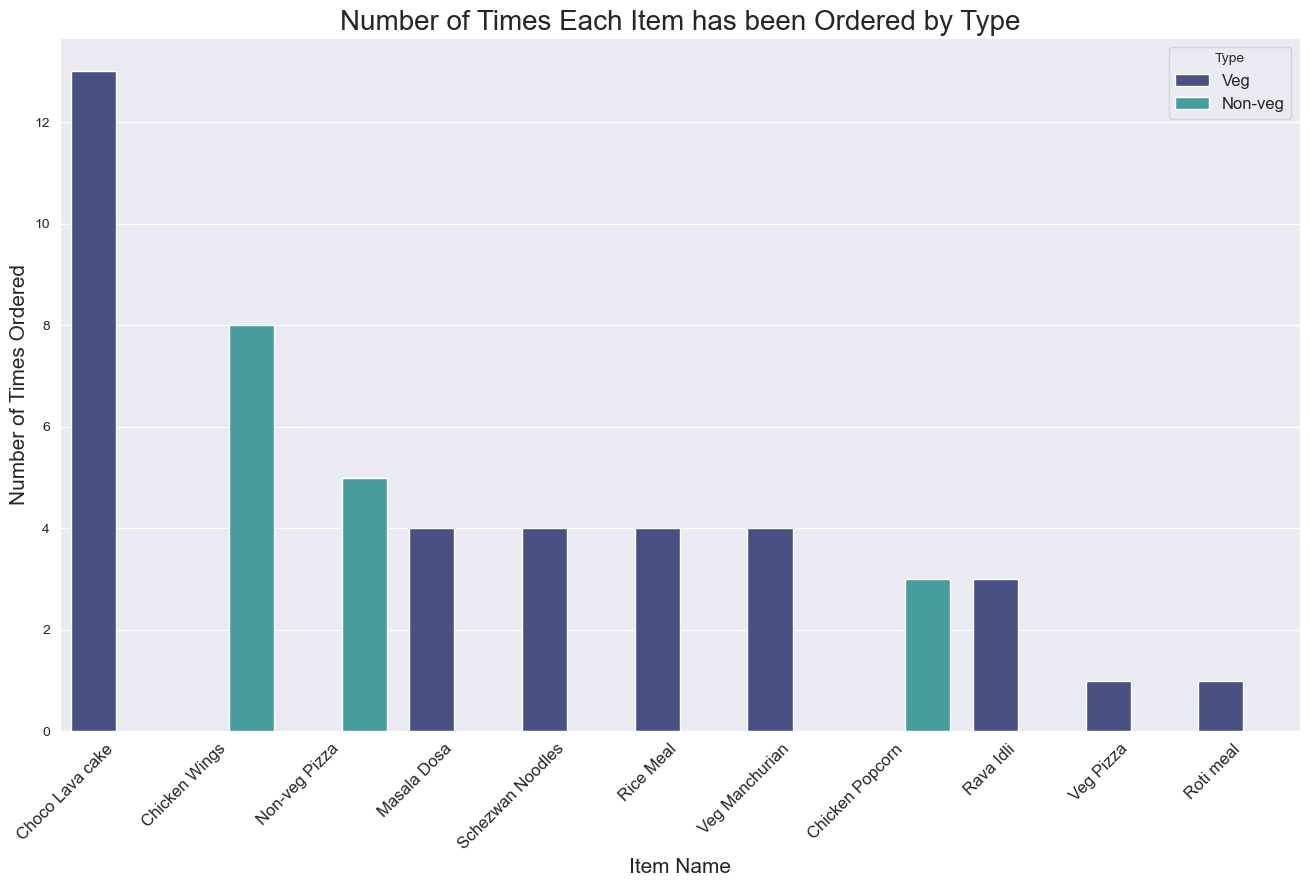

In [60]:
# Create the bar plot
plt.figure(figsize=(16, 9))
bar_plot = sns.barplot(data=df8, x='f_name', y='no_of_times_ordered', hue='type', palette='mako')

# Set title and labels
plt.title('Number of Times Each Item has been Ordered by Type', fontsize=20)
plt.xlabel('Item Name', fontsize=15)
plt.ylabel('Number of Times Ordered', fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Move legend to a better position
plt.legend(title='Type', loc='upper right', fontsize=12);

- This bar chart visualizes the number of times each food item is ordered, grouped by type. Each bar represents the count of orders for a specific food item within its respective type. 
- Based on customer preferences, consider adjusting the menu layout to make popular items more accessible and visible.
- Leverage the popularity of seasonal items by running targeted promotions during specific times of the year.
- Collect and analyze customer feedback on both high and low-performing items to make data-driven decisions on menu adjustments.
- This bar chart effectively communicates the total number of orders for each food type, allowing viewers to easily compare the popularity of different types of food.

By applying these insights, the restaurant can enhance customer satisfaction, optimize its menu, and implement effective marketing strategies to drive growth.

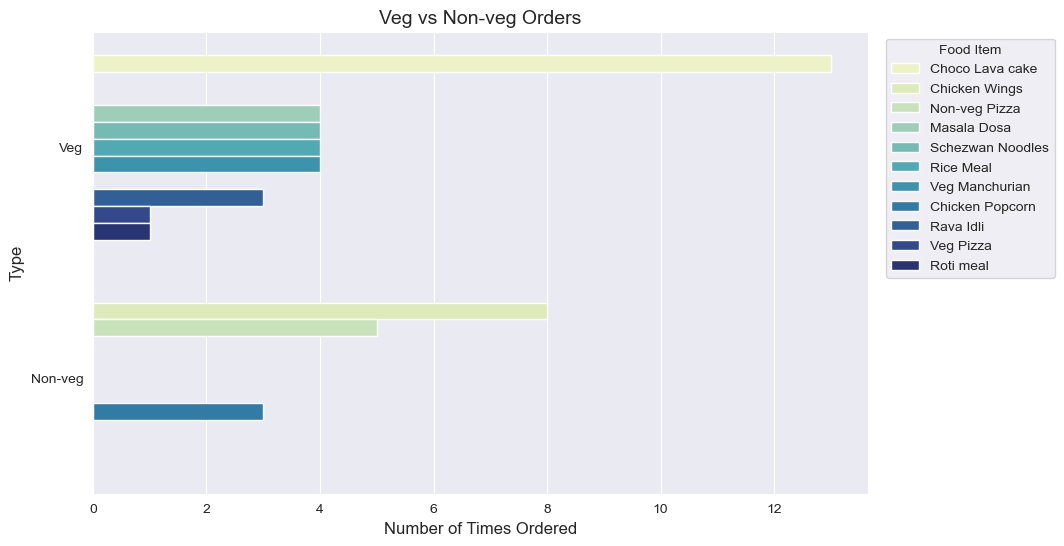

In [103]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df8, x='no_of_times_ordered', y='type', hue='f_name', palette='YlGnBu')

# Set title and labels
plt.title('Veg vs Non-veg Orders', fontsize=14)
plt.xlabel('Number of Times Ordered', fontsize=12)
plt.ylabel('Type', fontsize=12)

# Add legend with proper placement
plt.legend(title='Food Item', loc='upper right', bbox_to_anchor=(1.25, 1))

# Show plot
plt.show()

- By analysing this chart we can depict that customers perfer veg food items over non-veg so restaurants can run promotional campaigns focused on vegetarian dishes. Offer discounts or special deals to encourage more orders of these items.
- Redesign the menu to give prominence to vegetarian options. Make these dishes more visible and appealing with attractive descriptions and photos.

### Knowning about the total number of veg and non-veg orders.

In [104]:
cur9 = conn.cursor()
cur9.execute('select type, sum(no_of_times_ordered) as no_of_times_ordered from (select f.f_id, f_name, type, count(od.f_id) as no_of_times_ordered from food f join order_details od on f.f_id = od.f_id group by 1,2,3 order by 4 desc) d group by 1')

In [105]:
cur9.fetchall()

[('Non-veg', Decimal('16')), ('Veg', Decimal('34'))]

In [106]:
df9 = pd.read_sql_query("select type, sum(no_of_times_ordered) as no_of_times_ordered from (select f.f_id, f_name, type, count(od.f_id) as no_of_times_ordered from food f join order_details od on f.f_id = od.f_id group by 1,2,3 order by 4 desc) d group by 1",conn)
df9

C:\Users\ascen\AppData\Local\Temp\ipykernel_3816\207266931.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df9 = pd.read_sql_query("select type, sum(no_of_times_ordered) as no_of_times_ordered from (select f.f_id, f_name, type, count(od.f_id) as no_of_times_ordered from food f join order_details od on f.f_id = od.f_id group by 1,2,3 order by 4 desc) d group by 1",conn)


,type,no_of_times_ordered
0,Non-veg,16.0
1,Veg,34.0


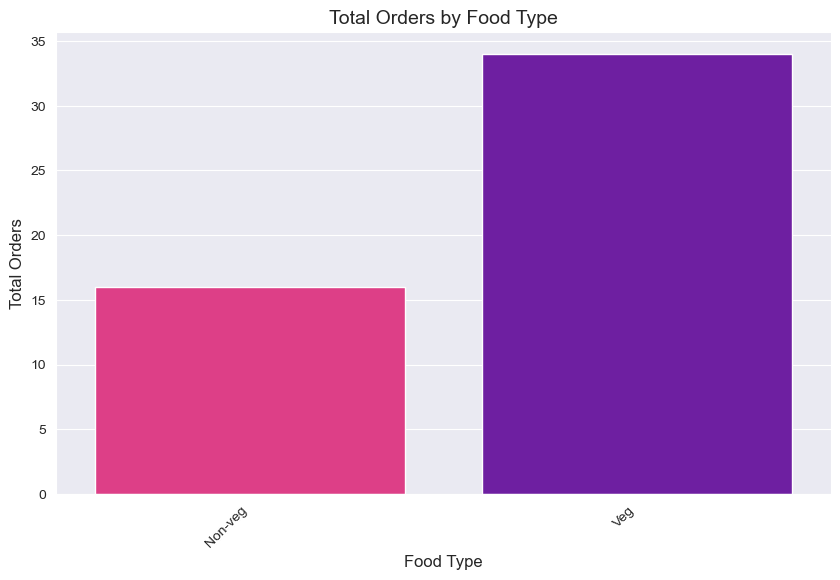

In [107]:
# Create the bar plot
plt.figure(figsize=(10, 6))
palette = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]
sns.barplot(data=df9, x='type', y='no_of_times_ordered',palette=palette)

# Set title and labels
plt.title('Total Orders by Food Type', fontsize=14)
plt.xlabel('Food Type', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

### Finding out the number of veg and non-veg orders for each restaurant along with their amount.

In [108]:
cur10 = conn.cursor()
cur10.execute('select d.type,a.r_id,count(distinct a.order_id) as total_orders ,count(*) as total_ordered_items,sum(c.price) as amount from orders a left join order_details b on a.order_id=b.order_id left join menu c on a.r_id = c.r_id and b.f_id = c.f_id left join food d on c.f_id=d.f_id group by 1,2')

In [109]:
cur10.fetchall()

[('Non-veg', 1, 5, 5, 2250),
 ('Non-veg', 2, 8, 11, 2740),
 ('Veg', 1, 4, 5, 800),
 ('Veg', 2, 5, 5, 575),
 ('Veg', 3, 4, 8, 940),
 ('Veg', 4, 4, 7, 1080),
 ('Veg', 5, 3, 7, 1450),
 (None, 4, 1, 2, None)]

In [110]:
df10=pd.read_sql_query("select d.type,a.r_id,count(distinct a.order_id) as total_orders ,count(*) as total_ordered_items,sum(c.price) as amount from orders a left join order_details b on a.order_id=b.order_id left join menu c on a.r_id = c.r_id and b.f_id = c.f_id left join food d on c.f_id=d.f_id group by 1,2 ",conn)
df10

C:\Users\ascen\AppData\Local\Temp\ipykernel_3816\3013365398.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df10=pd.read_sql_query("select d.type,a.r_id,count(distinct a.order_id) as total_orders ,count(*) as total_ordered_items,sum(c.price) as amount from orders a left join order_details b on a.order_id=b.order_id left join menu c on a.r_id = c.r_id and b.f_id = c.f_id left join food d on c.f_id=d.f_id group by 1,2 ",conn)


,type,r_id,total_orders,total_ordered_items,amount
0,Non-veg,1,5,5,2250.0
1,Non-veg,2,8,11,2740.0
2,Veg,1,4,5,800.0
3,Veg,2,5,5,575.0
4,Veg,3,4,8,940.0
5,Veg,4,4,7,1080.0
6,Veg,5,3,7,1450.0
7,None,4,1,2,NaN


The NaN value we get here is because, for r_id 4 we have 5 orders out of which order_id 1018 contains f_id 10 and 11 which are not present in the menu table corresponding to r_id 4. As a result food type is missing corresponding to it.

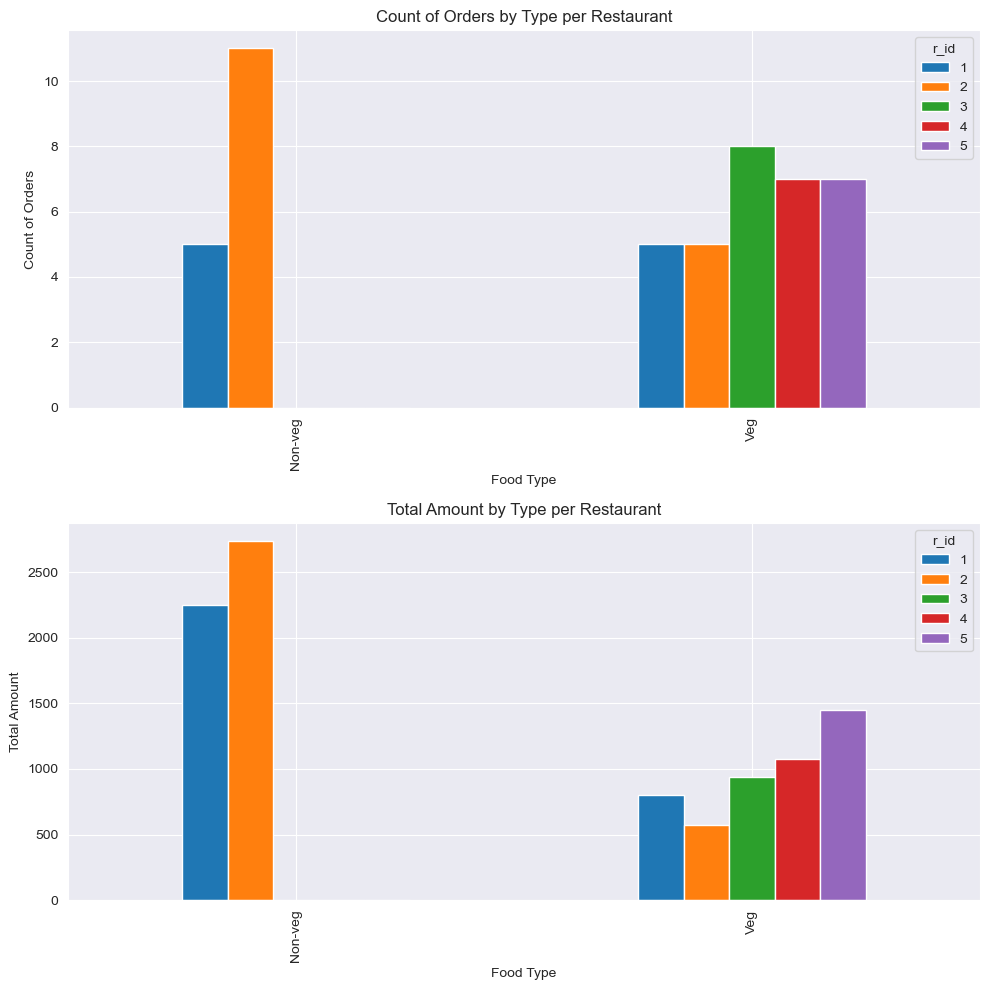

In [111]:
# Create a DataFrame
df = pd.DataFrame(df10)

# Create a bar chart for the count of orders
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Bar chart for count
df_grouped_count = df.groupby(['type', 'r_id'])['total_ordered_items'].sum().unstack()
df_grouped_count.plot(kind='bar', ax=ax[0])
ax[0].set_title('Count of Orders by Type per Restaurant')
ax[0].set_xlabel('Food Type')
ax[0].set_ylabel('Count of Orders')

# Bar chart for sum of prices
df_grouped_sum_price = df.groupby(['type', 'r_id'])['amount'].sum().unstack()
df_grouped_sum_price.plot(kind='bar', ax=ax[1])
ax[1].set_title('Total Amount by Type per Restaurant')
ax[1].set_xlabel('Food Type')
ax[1].set_ylabel('Total Amount')

plt.tight_layout()
plt.show()


- The first chart shows the count of orders by food type for each restaurant, while the second chart depicts the sum of prices for each food type per restaurant. 
- These insights can help in understanding the ordering behavior of customers at each restaurant and can inform decisions related to menu planning, pricing strategy, and marketing efforts.